# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [2]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [7]:
# How many countries are present?
len(df['country'].unique())

219

In [8]:
max(df['year'])-min(df['year'])

33

In [10]:
pd.set_option('display.max_rows', None)
df['country'].groupby([df['country']]).agg('count')
#No

country
Afghanistan                                             34
Albania                                                 34
Algeria                                                 34
American Samoa                                          34
Andorra                                                 34
Angola                                                  34
Anguilla                                                34
Antigua and Barbuda                                     34
Argentina                                               34
Armenia                                                 34
Aruba                                                   34
Australia                                               34
Austria                                                 34
Azerbaijan                                              34
Bahamas                                                 34
Bahrain                                                 34
Bangladesh                                      

In [11]:
df['country'].groupby([df['country']]).agg('count').loc[lambda x:x!=34]

country
Bonaire, Saint Eustatius and Saba     4
Curacao                               4
Montenegro                            9
Netherlands Antilles                 30
Serbia                                9
Serbia & Montenegro                  25
Sint Maarten (Dutch part)             4
South Sudan                           3
Timor-Leste                          12
Name: country, dtype: int64

In [12]:
df.iloc[:,3:57].dropna()
#0

,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,...,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564


## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [13]:
df.head()

,country,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dfLong=(df.melt(id_vars=['country', 'year'], var_name='n_val', value_name='val'))
dfLong.head()

,country,year,n_val,val
0,Afghanistan,1980,new_sp_m014,NaN
1,Afghanistan,1981,new_sp_m014,NaN
2,Afghanistan,1982,new_sp_m014,NaN
3,Afghanistan,1983,new_sp_m014,NaN
4,Afghanistan,1984,new_sp_m014,NaN


In [15]:
dfLong['n_val']=dfLong['n_val'].str.replace('new_','new')
dfLong.head()

,country,year,n_val,val
0,Afghanistan,1980,newsp_m014,NaN
1,Afghanistan,1981,newsp_m014,NaN
2,Afghanistan,1982,newsp_m014,NaN
3,Afghanistan,1983,newsp_m014,NaN
4,Afghanistan,1984,newsp_m014,NaN


In [16]:
dfLong['name']=[ (x.split('_')[0]) for x in dfLong['n_val'] ]
dfLong['gender_age']=[ (x.split('_')[1]) for x in dfLong['n_val'] ]
dfLong = dfLong.drop(columns=['n_val'])
dfLong.head()

,country,year,val,name,gender_age
0,Afghanistan,1980,NaN,newsp,m014
1,Afghanistan,1981,NaN,newsp,m014
2,Afghanistan,1982,NaN,newsp,m014
3,Afghanistan,1983,NaN,newsp,m014
4,Afghanistan,1984,NaN,newsp,m014


In [17]:
dfLong['gender']=dfLong['gender_age'].str[0]
dfLong['age'] =dfLong['gender_age'].str[1:]
dfLong.drop(columns=['gender_age'],inplace=True)
dfLong.head()

,country,year,val,name,gender,age
0,Afghanistan,1980,NaN,newsp,m,014
1,Afghanistan,1981,NaN,newsp,m,014
2,Afghanistan,1982,NaN,newsp,m,014
3,Afghanistan,1983,NaN,newsp,m,014
4,Afghanistan,1984,NaN,newsp,m,014


In [18]:
dfLong.rename(columns={'name':'diagnosis_method'},inplace = True)
dfLong['No_Of_Cases']=dfLong['val']
dfLong.drop(columns=['val'],inplace=True)
dfLong.head()

,country,year,diagnosis_method,gender,age,No_Of_Cases
0,Afghanistan,1980,newsp,m,014,NaN
1,Afghanistan,1981,newsp,m,014,NaN
2,Afghanistan,1982,newsp,m,014,NaN
3,Afghanistan,1983,newsp,m,014,NaN
4,Afghanistan,1984,newsp,m,014,NaN


In [19]:
dfLong['diagnosis_method']=dfLong['diagnosis_method'].replace(['newsp','newsn','newep','newrel'],
                                                                  ['Pulmonary Smear (+)','Pulmonary Smear (-)',
                                                                   'Extrapulmonary','Relapse'])
dfLong.head()

,country,year,diagnosis_method,gender,age,No_Of_Cases
0,Afghanistan,1980,Pulmonary Smear (+),m,014,NaN
1,Afghanistan,1981,Pulmonary Smear (+),m,014,NaN
2,Afghanistan,1982,Pulmonary Smear (+),m,014,NaN
3,Afghanistan,1983,Pulmonary Smear (+),m,014,NaN
4,Afghanistan,1984,Pulmonary Smear (+),m,014,NaN


In [21]:
dfLong['higherage'] = dfLong['age'].str[-2:]
dfLong['lowerage'] = dfLong['age'].str[0:-2]
dfLong['age']=dfLong['lowerage'].astype('str')+'-'+dfLong['higherage'].astype('str')
dfLong.drop(columns=['higherage','lowerage'],inplace=True)
dfLong.head()

,country,year,diagnosis_method,gender,age,No_Of_Cases
0,Afghanistan,1980,Pulmonary Smear (+),m,0-14,NaN
1,Afghanistan,1981,Pulmonary Smear (+),m,0-14,NaN
2,Afghanistan,1982,Pulmonary Smear (+),m,0-14,NaN
3,Afghanistan,1983,Pulmonary Smear (+),m,0-14,NaN
4,Afghanistan,1984,Pulmonary Smear (+),m,0-14,NaN


## Question 3: Create a graph that shows when countries started to report TB cases.

In [26]:
df1 = df[['country','year']].loc[df.groupby('country')['year'].idxmin()]

In [27]:
df1.head()

,country,year
0,Afghanistan,1980
34,Albania,1980
68,Algeria,1980
102,American Samoa,1980
136,Andorra,1980


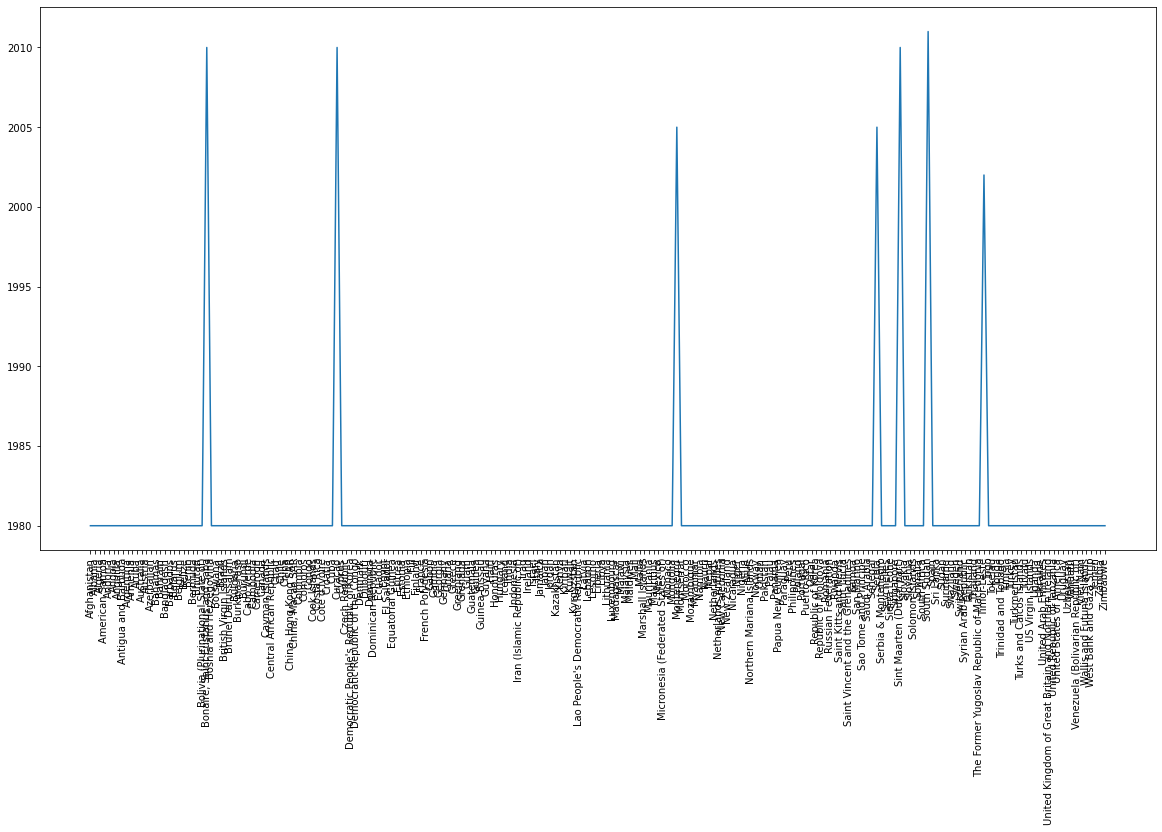

In [28]:
# plt.plot(df1['country'],df1['year'])


fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df1['country'],dff['year'])
plt.xticks(rotation=90)
plt.show()